In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directory where the dataset is located
data_dir = "C:\\Users\\DELL\\Downloads\\archive (19)\\dataset"

# Define data generator with validation split
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2  # 20% of the data will be used for validation
)
datagen1 = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2, horizontal_flip=True, zoom_range=0.2, shear_range=0.2  # 20% of the data will be used for validation
)

# Creating training generator
train_generator1 = datagen1.flow_from_directory(
    directory=data_dir,
    target_size=(224, 224),
    class_mode="categorical",
    batch_size=32,
    subset='training'  # Subset for training data
)

# Creating validation generator
validation_generator = datagen.flow_from_directory(
    directory=data_dir,
    target_size=(224, 224),
    class_mode="categorical",
    batch_size=32,
    subset='validation'  # Subset for validation data
)

# Now, create a test generator without any validation split
test_generator1 = ImageDataGenerator(rescale=1.0 / 255).flow_from_directory(
    directory=data_dir,
    target_size=(224, 224),
    class_mode="categorical",
    batch_size=32,
    subset=None  # No subset, includes all data
)

# Now you have separate generators for training, validation, and test sets


Found 648 images belonging to 4 classes.
Found 160 images belonging to 4 classes.


Found 808 images belonging to 4 classes.


In [70]:
for batch in validation_generator
    print("Batch shape:", batch[0].shape) 
    break  

Batch shape: (32, 224, 224, 3)


In [71]:
# Calculate the number of images in each set
num_train_images = len(train_generator1.filenames)
num_validation_images = len(validation_generator.filenames)
# Calculate the total number of images
total_images = num_train_images + num_validation_images

print("Total number of images in training set:", num_train_images)
print("Total number of images in test set:", num_validation_images)
print("Total number of images in all sets:", total_images)


Total number of images in training set: 648
Total number of images in test set: 160
Total number of images in all sets: 808


In [55]:
for batch in train_generator1:
    print("Batch shape:", batch[0].shape) 
    break  
for batch in validation_generator:
    print("Batch shape:", batch[0].shape) 
    break  

Batch shape: (32, 224, 224, 3)
Batch shape: (32, 224, 224, 3)


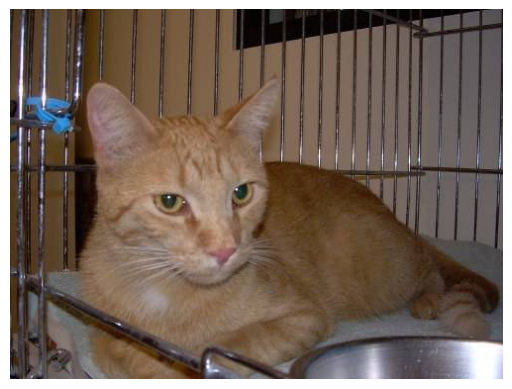

In [52]:
from keras.preprocessing import image
from matplotlib import pyplot as plt

sample_path = "C:\\Users\\DELL\\Downloads\\archive (19)\\dataset\\cats\\cat.83.jpg"
img = image.load_img(sample_path)
x = image.img_to_array(img)/255.0
plt.imshow(img)
plt.axis("off")
plt.show()

In [56]:

from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))
model.summary()



Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [61]:
from keras.layers import * 
from keras.models import Model
av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(256,activation='relu')(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(4,activation='softmax')(d1)

model_new = Model(inputs=model.input,outputs=fc2)

model_new.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,113,284 (91.98 MB)

 Trainable params: 24,060,164 (91.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [62]:
for ix in range(len(model_new.layers)):
    # pass
    print(ix,model_new.layers[ix])

for ix in range(169):
    model_new.layers[ix].trainable = False
    
model_new.summary()

0 <InputLayer name=input_layer, built=True>
1 <ZeroPadding2D name=conv1_pad, built=True>
2 <Conv2D name=conv1_conv, built=True>
3 <BatchNormalization name=conv1_bn, built=True>
4 <Activation name=conv1_relu, built=True>
5 <ZeroPadding2D name=pool1_pad, built=True>
6 <MaxPooling2D name=pool1_pool, built=True>
7 <Conv2D name=conv2_block1_1_conv, built=True>
8 <BatchNormalization name=conv2_block1_1_bn, built=True>
9 <Activation name=conv2_block1_1_relu, built=True>
10 <Conv2D name=conv2_block1_2_conv, built=True>
11 <BatchNormalization name=conv2_block1_2_bn, built=True>
12 <Activation name=conv2_block1_2_relu, built=True>
13 <Conv2D name=conv2_block1_0_conv, built=True>
14 <Conv2D name=conv2_block1_3_conv, built=True>
15 <BatchNormalization name=conv2_block1_0_bn, built=True>
16 <BatchNormalization name=conv2_block1_3_bn, built=True>
17 <Add name=conv2_block1_add, built=True>
18 <Activation name=conv2_block1_out, built=True>
19 <Conv2D name=conv2_block2_1_conv, built=True>
20 <BatchNorm

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,113,284 (91.98 MB)

 Trainable params: 1,581,316 (6.03 MB)

 Non-trainable params: 22,531,968 (85.95 MB)

In [64]:
from keras.optimizers import Adam
adam = Adam(learning_rate=0.00003)
model_new.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')


In [76]:
history = model_new.fit(
    train_generator1,
    epochs = 10,
    steps_per_epoch = 21,
    validation_data = validation_generator,
    validation_steps = 5   
)

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.4449 - loss: 1.2299 - val_accuracy: 0.2937 - val_loss: 1.3586
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.4452 - loss: 1.2025 - val_accuracy: 0.2500 - val_loss: 1.3407
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.5081 - loss: 1.1101 - val_accuracy: 0.3438 - val_loss: 1.2558
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.4818 - loss: 1.1606 - val_accuracy: 0.4750 - val_loss: 1.2028
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+

In [77]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss= history.history['val_loss']

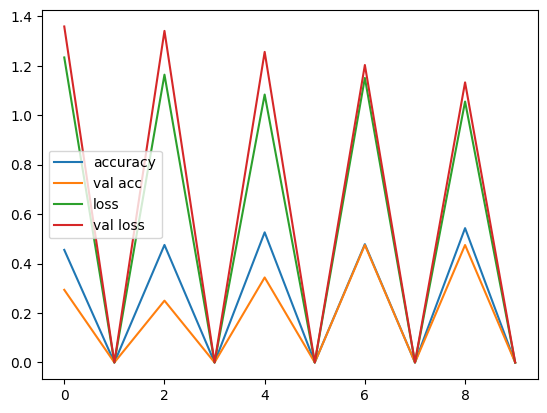

In [78]:
plt.plot(acc,label="accuracy")
plt.plot(val_acc,label="val acc")
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val loss')
plt.legend()
plt.show()

In [80]:
print(model_new.evaluate(validation_generator))

5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.4804 - loss: 1.1215
[1.1326338052749634, 0.4749999940395355]


In [ ]:
# accuracy can be incresed on running more no. of epochs as it is uderft we can see 

In [82]:
for ix in range(len(model_new.layers)):
    # pass
    print(ix,model_new.layers[ix])
    if(ix==170):
        break

0 <InputLayer name=input_layer, built=True>
1 <ZeroPadding2D name=conv1_pad, built=True>
2 <Conv2D name=conv1_conv, built=True>
3 <BatchNormalization name=conv1_bn, built=True>
4 <Activation name=conv1_relu, built=True>
5 <ZeroPadding2D name=pool1_pad, built=True>
6 <MaxPooling2D name=pool1_pool, built=True>
7 <Conv2D name=conv2_block1_1_conv, built=True>
8 <BatchNormalization name=conv2_block1_1_bn, built=True>
9 <Activation name=conv2_block1_1_relu, built=True>
10 <Conv2D name=conv2_block1_2_conv, built=True>
11 <BatchNormalization name=conv2_block1_2_bn, built=True>
12 <Activation name=conv2_block1_2_relu, built=True>
13 <Conv2D name=conv2_block1_0_conv, built=True>
14 <Conv2D name=conv2_block1_3_conv, built=True>
15 <BatchNormalization name=conv2_block1_0_bn, built=True>
16 <BatchNormalization name=conv2_block1_3_bn, built=True>
17 <Add name=conv2_block1_add, built=True>
18 <Activation name=conv2_block1_out, built=True>
19 <Conv2D name=conv2_block2_1_conv, built=True>
20 <BatchNorm